In [25]:
import pyforest
import numpy as np
import matplotlib.pyplot as plt

In [26]:
y = np.array([-61.53,-19.19,401.13,601.19,799.28,584.84,1156.96,901.36,1126.31,1280.4])
x = np.array([1,21,41,61,81,101,121,141,161,181])

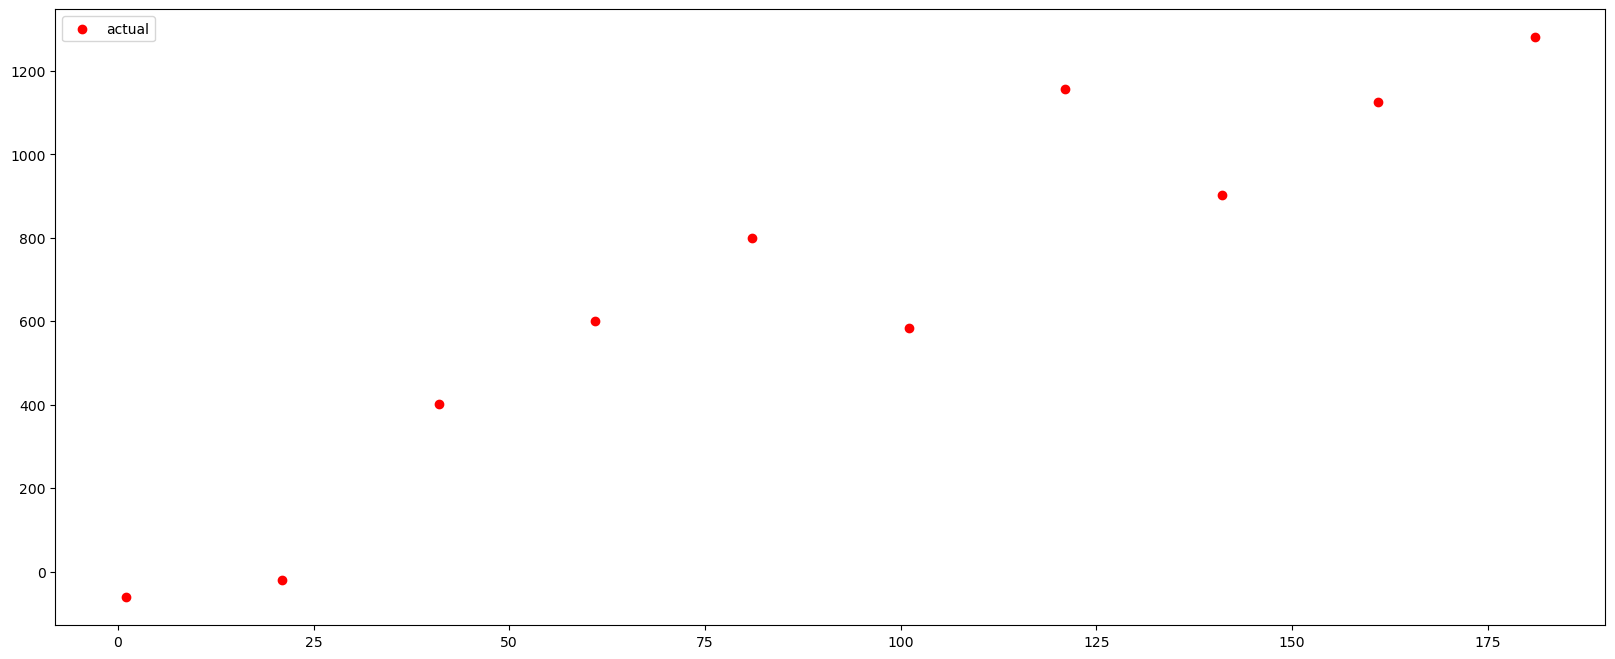

In [27]:
plt.figure(figsize = (20,8))
#plt.plot(x, y, color = 'red', label = 'actual')
plt.scatter(x,y, color = 'red', label = 'actual')
plt.legend()
plt.show()

In [28]:
N = len(x)

In [29]:
#Function which we want to optimize (a, b are weights; x is the independent variable)
def func(a,b):
    f = a+b*x
    return f

In [30]:
#Loss function which is actual value minus predicted value; Here y is actual value
def loss(a,b):
    lo = y - func(a,b)
    return lo

In [31]:
#Cost function - Mean Square Error
def Cost(a,b):
    cost = (1/2)*(((loss(a,b))**2)/N).sum()
    return Cost

In [32]:
#Derivative of the above Cost function with respect to a
def Cost_der_a(a,b,x,y):
    return -sum((1/N) *(loss(a,b)))
#Derivative of the above Cost function with respect to b
def Cost_der_b(a,b,x,y):
    return -(1/N) * ((x.dot(loss(a,b))))

In [33]:
#Set up some initial values for the weights
a_in = 0
b_in = 0
learning_rate = .001
error_rate = .001 # Error threshold
list_a = [a_in]
list_b = [b_in]
i = 0
error_a = error_b =.1,.1
error_a_list,error_b_list =[error_a] ,[error_b]

while(np.abs(error_a) > error_rate).any() or (np.abs(error_b) > error_rate).any():#iterate until error is below the threshold
    #calculating gradients
    A=Cost_der_a(list_a[i],list_b[i],x,y)
    B=Cost_der_b(list_b[i],list_b[i],x,y)
    #Calculating new value of weights a,b and taking a step (based on learning rate) towards
    a_in -= (learning_rate * A/N)
    b_in -= (learning_rate * B/N)

    list_a.append(a_in)
    list_b.append(b_in)
    error_a = list_a[i] - list_a[i+1]
    error_b = list_b[i] - list_b[i+1]
    i += 1
    error_a_list.append(error_a)
    error_b_list.append(error_b)
    #print ()
    continue
print('Final values of weights:',a_in,b_in)

Final values of weights: 0.06362545398331644 7.339275868112207


In [39]:
# Ensure all elements are numbers and not sequences
error_a_list = [np.abs(e) if isinstance(e, (int, float)) else 0 for e in error_a_list]
error_b_list = [np.abs(e) if isinstance(e, (int, float)) else 0 for e in error_b_list]

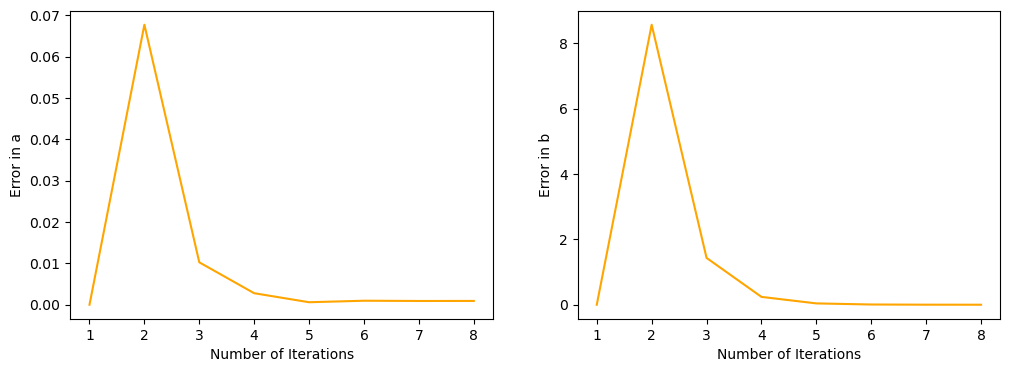

In [43]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([p for p in range(1, len(error_a_list) + 1)], error_a_list, color='orange')
plt.xlabel('Number of Iterations')
plt.ylabel('Error in a')

plt.subplot(1, 2, 2)
plt.plot([x for x in range(1, len(error_b_list) + 1)], error_b_list, color='orange')
plt.xlabel('Number of Iterations')
plt.ylabel('Error in b')

plt.show()

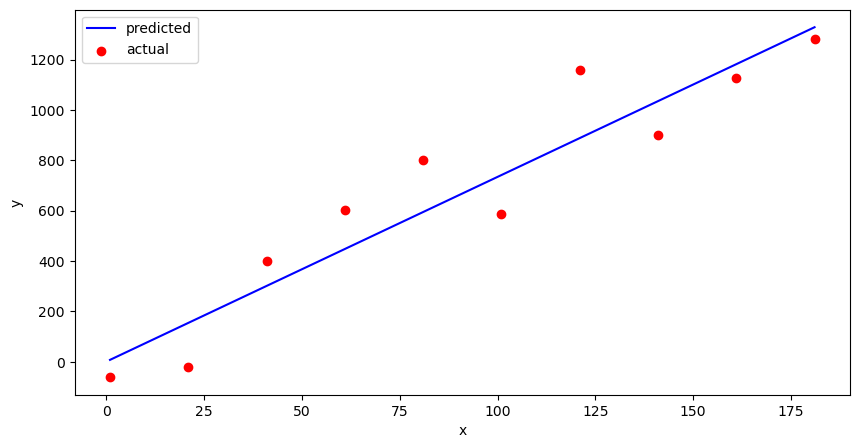

In [47]:
#Plot showing the best fit line that we predicted by optimizing weights a,b using gradient descent
plt.figure(figsize=(10,5))
plt.plot(x,(a_in+b_in*x),color='blue',label='predicted')
plt.scatter(x,y,color='red',label='actual')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [53]:
x = sm.add_constant(x)
m = sm.OLS(y,x).fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
m.summary()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     61.14
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           5.15e-05
Time:                        13:05:32   Log-Likelihood:                -64.392
No. Observations:                  10   AIC:                             132.8
Df Residuals:                       8   BIC:                             133.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8811    100.306      0.138      0.893    -217.424     245.186
x1             7.2878      0.932      7.819      0.000       5.138       9.437
==============================================================================
Omnibus:                        1.839   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                0.976
Skew:                           0.409   Prob(JB):                        0.614
Kurtosis:                       1.707   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
print('Gradient Descent output:','Slope =', a_in, 'Intercept=', b_in)
print('OLS output:', )'Slope=',7.28

Gradient Descent output: Slope = 0.06362545398331644 Intercept= 7.339275868112207
